In [299]:
import pandas as pd
data = pd.read_csv("seeds_dataset.txt", sep = "\s+", header=None)
data.columns = ['A', 'C','P','L','W','AC','LK','Classes']
data.keys()
import numpy as np


In [300]:
import matplotlib.pyplot as plt
import seaborn as sns


In [301]:
## %matplotlib inline
#2.A

# split all classes in 40,15,15 train,val,test for each one 
X_initial = data.loc[:, ~data.columns.isin(['Classes'])]
Y_initial = data['Classes']

from sklearn.model_selection import train_test_split
Xtrain1,Xtest_val1,Ytrain1,Ytest_val1 =train_test_split(X_initial,Y_initial,train_size=0.5756,random_state=114,shuffle=True,stratify=Y_initial)
Xval1,Xtest1,Yval1,Ytest1 = train_test_split(Xtest_val1,Ytest_val1,test_size= 0.5,random_state=114,shuffle=True,stratify=Ytest_val1)

#2.B 
# split only 1,3 classes(Kama,Canadian)
data_13 = data[data['Classes'] != 2]
X = data_13.loc[:, ~data_13.columns.isin(['Classes'])]
Y = data_13['Classes']


Seperation of dataset in 40,15,15% train,validation and test for each class

In [302]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest_val,Ytrain,Ytest_val =train_test_split(X,Y,train_size=0.5756,random_state=116,shuffle=True,stratify=Y)
Xval,Xtest,Yval,Ytest = train_test_split(Xtest_val,Ytest_val,test_size= 0.5,random_state=116,shuffle=True,stratify=Ytest_val)

In [303]:
print(Xtrain.shape), print(Ytrain.shape)
print(Xval.shape), print(Yval.shape)
print(Xtest.shape), print(Ytest.shape)
train_test_split

(80, 7)
(80,)
(30, 7)
(30,)
(30, 7)
(30,)


<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [304]:
from sklearn.svm import SVC 


In [305]:

from sklearn.model_selection import GridSearchCV

In [306]:
param_grid = {'C':[0.1,1,10,100,1000,10000]}


In [307]:
grid = GridSearchCV(SVC(),param_grid,verbose=10)
grid.fit(Xtrain,Ytrain)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START C=0.1.......................................................
[CV 1/5; 1/6] END ........................C=0.1;, score=0.688 total time=   0.0s
[CV 2/5; 1/6] START C=0.1.......................................................
[CV 2/5; 1/6] END ........................C=0.1;, score=0.938 total time=   0.0s
[CV 3/5; 1/6] START C=0.1.......................................................
[CV 3/5; 1/6] END ........................C=0.1;, score=1.000 total time=   0.0s
[CV 4/5; 1/6] START C=0.1.......................................................
[CV 4/5; 1/6] END ........................C=0.1;, score=0.875 total time=   0.0s
[CV 5/5; 1/6] START C=0.1.......................................................
[CV 5/5; 1/6] END ........................C=0.1;, score=0.938 total time=   0.0s
[CV 1/5; 2/6] START C=1.........................................................
[CV 1/5; 2/6] END ..........................C=1;,

GridSearchCV(estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000, 10000]},
             verbose=10)

In [308]:
grid.best_params_

{'C': 100}

In [309]:
grid.best_estimator_

SVC(C=100)

In [310]:
grid_predictions = grid.predict(Xval)
grid_predictions

array([3, 1, 1, 3, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 1, 3, 1, 1,
       3, 3, 3, 1, 1, 3, 3, 3], dtype=int64)

In [311]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Yval,grid_predictions)*100
accuracy

96.66666666666667

In [312]:
print(""""Best accuracy for the validate set gives the box constraint {q}
      with accuracy {r:1.3f}""".format(r=accuracy,q=grid.best_params_))

"Best accuracy for the validate set gives the box constraint {'C': 100}
      with accuracy 96.667


In [313]:
from sklearn.svm import SVC 
svm2 = SVC(kernel='linear',C=100)
svm2.fit(Xtrain,Ytrain)
from sklearn.metrics import accuracy_score
y_predictions = svm2.predict(Xtest)
accuracy_test = accuracy_score(Ytest,y_predictions)
error_rate = 1 - accuracy_test
print("The classification error is {r:1.3f}".format(r=error_rate))

The classification error is 0.100


In [314]:
#2C
from sklearn.model_selection import StratifiedKFold
accuracy_test=[]
skf = StratifiedKFold(n_splits=5,random_state = None, shuffle=False)
skf.get_n_splits(X)

for train_index, test_index in skf.split(X,Y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    svm2.fit(X_train,y_train)
    Y_k_pred = svm2.predict(X_test)
    from sklearn.metrics import accuracy_score

    accuracy_test = accuracy_score(y_test,Y_k_pred)
    error_rate = 1 - accuracy_test
import numpy as np
z1=np.array(error_rate).mean()
z2 =np.array(error_rate).std()
print("The mean of the classification error for the test set is {r1:1.3f}".format(r1=z1))
print("The standard deviation of the classification error for the test set is {r2:1.3f}".format(r2=z2))

The mean of the classification error for the test set is 0.179
The standard deviation of the classification error for the test set is 0.000


In [315]:
#2.D
# polynomial kernel

from sklearn.model_selection import StratifiedKFold
accuracy_test=[]
skf = StratifiedKFold(n_splits=5,random_state = None, shuffle=False)
skf.get_n_splits(X)

for train_index, test_index in skf.split(X,Y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    from sklearn.svm import SVC 
    svm3 = SVC(kernel='poly',C=100)
    svm3.fit(X_train,y_train)
    Y_k_pred_pol = svm3.predict(X_test)
    from sklearn.metrics import accuracy_score

    accuracy_test = accuracy_score(y_test,Y_k_pred_pol)
    error_rate = 1 - accuracy_test
import numpy as np
print(" Classification error with poly kernel is {r:1.3f}".format(r= error_rate))

 Classification error with poly kernel is 0.214


In [316]:
#2.D
# rbf kernel

from sklearn.model_selection import StratifiedKFold
accuracy_test=[]
skf = StratifiedKFold(n_splits=5,random_state = None, shuffle=False)
skf.get_n_splits(X)

for train_index, test_index in skf.split(X,Y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    from sklearn.svm import SVC 
    svm4 = SVC(kernel='rbf',C=100)
    svm4.fit(X_train,y_train)
    Y_k_pred_pol = svm4.predict(X_test)
    from sklearn.metrics import accuracy_score

    accuracy_test = accuracy_score(y_test,Y_k_pred_pol)
    error_rate = 1 - accuracy_test
import numpy as np
print(" Classification error with rbf kernel is {r:1.3f}".format(r= error_rate))

 Classification error with rbf kernel is 0.250


In [317]:
# sigmoid kernel
from sklearn.model_selection import StratifiedKFold
accuracy_test=[]
skf = StratifiedKFold(n_splits=5,random_state = None, shuffle=False)
skf.get_n_splits(X)

for train_index, test_index in skf.split(X,Y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    from sklearn.svm import SVC 
    svm5 = SVC(kernel='sigmoid',C=100)
    svm5.fit(X_train,y_train)
    Y_k_pred_pol = svm5.predict(X_test)
    from sklearn.metrics import accuracy_score

    accuracy_test = accuracy_score(y_test,Y_k_pred_pol)
    error_rate = 1 - accuracy_test
import numpy as np
print(" Classification error with sigmoid kernel is {r:1.3f}".format(r= error_rate))

 Classification error with sigmoid kernel is 0.536


In [318]:
#2E using seperate SVMs for one versus one 
X_initial = data.loc[:, ~data.columns.isin(['Classes'])]
Y_initial = data['Classes']

from sklearn.model_selection import train_test_split
Xtrain1,Xtest_val1,Ytrain1,Ytest_val1 =train_test_split(X_initial,Y_initial,train_size=0.5756,random_state =5,shuffle=True,stratify=Y_initial)
Xval1,Xtest1,Yval1,Ytest1 = train_test_split(Xtest_val1,Ytest_val1,test_size= 0.5,random_state =5,shuffle=True,stratify=Ytest_val1)
Xtrain1 
# 1 - 2 classes

data_12 = data[data['Classes'] != 3]
X12 = data_12.loc[:, ~data_12.columns.isin(['Classes'])]
Y12 = data_12['Classes']

Xtrain12,Xtest_val12,Ytrain12,Ytest_val12 =train_test_split(X12,Y12,train_size=0.5756,random_state =235,shuffle=True,stratify=Y12)
Xval12,Xtest12,Yval12,Ytest12 = train_test_split(Xtest_val12,Ytest_val12,test_size= 0.5,random_state =235,shuffle=True,stratify=Ytest_val12)
from sklearn.svm import SVC 
svm12 = SVC(kernel='linear')
svm12.fit(Xtrain12,Ytrain12)

from sklearn.metrics import accuracy_score
y_predictions12 = svm12.predict(Xtest12)
accuracy_test12 = accuracy_score(Ytest12,y_predictions12)*100

# 1 - 3 classes
data_13 = data[data['Classes'] != 2]
X13 = data_13.loc[:, ~data_13.columns.isin(['Classes'])]
Y13 = data_13['Classes']

Xtrain13,Xtest_val13,Ytrain13,Ytest_val13 =train_test_split(X13,Y13,train_size=0.5756,random_state =235,shuffle=True,stratify=Y13)
Xval13,Xtest13,Yval13,Ytest13 = train_test_split(Xtest_val13,Ytest_val13,test_size= 0.5,random_state =235,shuffle=True,stratify=Ytest_val13)

svm13 = SVC(kernel='linear')
svm13.fit(Xtrain13,Ytrain13)


y_predictions13 = svm13.predict(Xtest13)
accuracy_test13 = accuracy_score(Ytest13,y_predictions13)*100

# 2 - 3 classes
data_23 = data[data['Classes'] != 1]
X23 = data_23.loc[:, ~data_23.columns.isin(['Classes'])]
Y23 = data_23['Classes']

Xtrain23,Xtest_val23,Ytrain23,Ytest_val23 =train_test_split(X23,Y23,train_size=0.5756,random_state =235,shuffle=True,stratify=Y23)
Xval23,Xtest23,Yval23,Ytest23 = train_test_split(Xtest_val23,Ytest_val23,test_size= 0.5,random_state =235,shuffle=True,stratify=Ytest_val23)

svm23 = SVC(kernel='linear')
svm23.fit(Xtrain23,Ytrain23)
X_initial = data.loc[:, ~data.columns.isin(['Classes'])]
Y_initial = data['Classes']
y_predictions23 = svm23.predict(Xtest23)
accuracy_test23 = accuracy_score(Ytest23,y_predictions23)*100

from sklearn.ensemble import VotingClassifier
clf_voting = VotingClassifier( estimators =[('12',svm12),('13',svm13),('23',svm23)])
clf_voting.fit(Xtrain1,Ytrain1)
y_pred = clf_voting.predict(Xtest1)
acc = accuracy_score(Ytest1,y_pred)*100

print("The classification accuracy is {r:1.3f}".format(r=acc))





The classification accuracy is 88.889


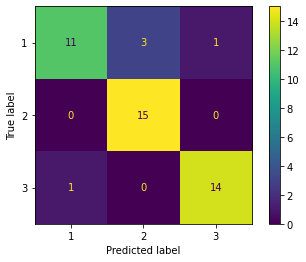

In [319]:
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf_voting, Xtest1, Ytest1)
plt.show()

In [320]:
#2.E using ovo function
X_initial = data.loc[:, ~data.columns.isin(['Classes'])]
Y_initial = data['Classes']
from sklearn.model_selection import train_test_split
Xtrain1,Xtest_val1,Ytrain1,Ytest_val1 =train_test_split(X_initial,Y_initial,train_size=0.5756,random_state=104,shuffle=True,stratify=Y_initial)
Xval1,Xtest1,Yval1,Ytest1 = train_test_split(Xtest_val1,Ytest_val1,test_size= 0.5,random_state=104,shuffle=True,stratify=Ytest_val1)
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
# define model
model = SVC()
# define ovo strategy
ovo = OneVsOneClassifier(model)
# fit model
ovo.fit(Xtrain1, Ytrain1)
# make predictions
Ytest_pred = ovo.predict(Xtest1)
from sklearn.metrics import accuracy_score

accuracy_test = accuracy_score(Ytest1,Ytest_pred)*100
error_rate = 1 - accuracy_test
print("The classification accuracy is {r:1.3f}".format(r=accuracy_test))

The classification accuracy is 84.444


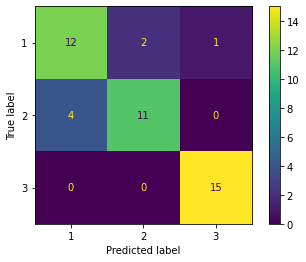

In [321]:
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(ovo, Xtest1, Ytest1)
plt.show()

In [322]:
#2C using only kfold
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(X)
KFold(n_splits=5,random_state = None, shuffle=False)
for train_index, test_index in kf.split(X,Y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    svm2.fit(X_train,y_train)
    Y_k_pred = svm2.predict(X_test)
    from sklearn.metrics import accuracy_score

    accuracy_test = accuracy_score(y_test,Y_k_pred)
    error_rate = 1 - accuracy_test
import numpy as np
z=np.array(accuracy_test).mean()
print("The mean of the classification error for the test set is {r1:1.3f}".format(r1=1-z))
print("The deviation of the classification error for the test set is {r2:1.3f}".format(r2=error_rate.std()))





The mean of the classification error for the test set is 0.179
The deviation of the classification error for the test set is 0.000
